<a href="https://colab.research.google.com/github/prachimethi/assignment/blob/main/EDA_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

# **EDA1 : BIKE DETAILS DATASET**

In [ ]:
df = pd.read_csv("/content/BIKE DETAILS.csv")

In [ ]:
df

,name,selling_price,year,seller_type,owner,km_driven,ex_showroom_price
0,Royal Enfield Classic 350,175000,2019,Individual,1st owner,350,NaN
1,Honda Dio,45000,2017,Individual,1st owner,5650,NaN
2,Royal Enfield Classic Gunmetal Grey,150000,2018,Individual,1st owner,12000,148114.0
3,Yamaha Fazer FI V 2.0 [2016-2018],65000,2015,Individual,1st owner,23000,89643.0
4,Yamaha SZ [2013-2014],20000,2011,Individual,2nd owner,21000,NaN
...,...,...,...,...,...,...,...
1056,Activa 3g,17000,2010,Individual,1st owner,500000,52000.0
1057,Honda CB twister,16000,2012,Individual,1st owner,33000,51000.0
1058,Bajaj Discover 125,15000,2013,Individual,2nd owner,35000,57000.0
1059,Honda CB Shine,12000,2009,Individual,1st owner,53000,58000.0


ques-1 What is the range of selling prices in the dataset ?

In [ ]:
range = max(df['selling_price']) - min(df['selling_price'])
range

755000

Ques-2 What is the median selling price for bikes in the dataset?

In [ ]:
median = df['selling_price'].median()
median

45000.0

Ques-3 What is the most common seller type?

In [ ]:
#Individuals are common seller types
df['seller_type'].value_counts()

,count
seller_type,
Individual,1055
Dealer,6


ques-4 How many bikes have driven more than 50,000 kilometers?

In [ ]:
# 170 bikes are drived more than 50000 km
km = df['km_driven'] > 50000
km.value_counts()

,count
km_driven,
False,891
True,170


Ques-5 What is the average km_driven value for each ownership type ?

In [ ]:
df['km_driven'].groupby(df['owner']).mean()

,km_driven
owner,
1st owner,32816.583333
2nd owner,39288.991870
3rd owner,33292.181818
4th owner,311500.000000


Ques-6 What proportion of bikes are from the year 2015 or older?

In [ ]:
#601 bikes are older than 2015
prop = df['year'] <= 2015
prop.value_counts()

,count
year,
True,601
False,460


Ques-7  What is the trend of missing values across the dataset ?

In [ ]:
#435 missing values are there from column ex_showroom_price
df.isnull().sum()

,0
name,0
selling_price,0
year,0
seller_type,0
owner,0
km_driven,0
ex_showroom_price,435


Ques-8 What is the highest ex_showroom_price recorded, and for which bike ?

In [ ]:
# highest ex showroom is 1278000.0 of bike Yo Style
high = (df['name']).groupby(df['ex_showroom_price']).max()
high.max()

'Yo Style'

In [ ]:
df['ex_showroom_price'].max()

1278000.0

Ques-9 What is the total number of bikes listed by each seller type?

In [ ]:
# individuals have buyed 1055 number of bikes and dealers have total number of six
df['seller_type'].value_counts()


,count
seller_type,
Individual,1055
Dealer,6


Ques-10 What is the relationship between selling_price and km_driven for first-owner bikes ?

In [ ]:
firowner = df[df['owner'] == "1st owner"]
firowner.value_counts()
r = df['selling_price'].corr(df['km_driven'])


Ques-11  Identify and remove outliers in the km_driven column using the IQR method ?

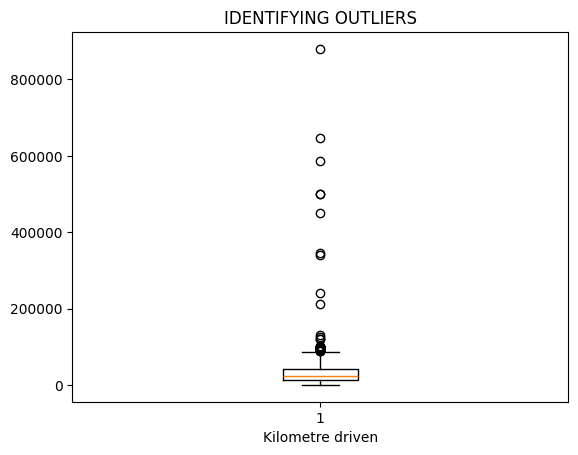

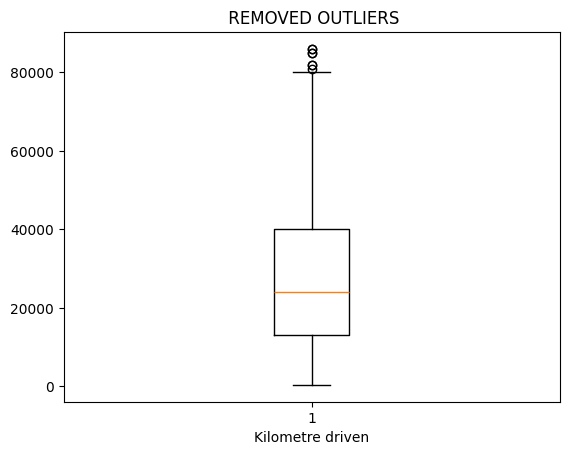

In [ ]:
Q1 = df['km_driven'].quantile(0.25)
Q3 = df['km_driven'].quantile(0.75)
IQR = Q3 - Q1

#calculate the lower and upper fence
lower_fence = Q1 - 1.5 * IQR
upper_fence = Q3 + 1.5 * IQR

# Identify outliers (km_driven values outside the bounds)
outliers = df[(df['km_driven'] < lower_fence) | (df['km_driven'] > upper_fence)]

# Display the outliers
outliers

#outliers visualization
plt.boxplot(data = df, x = 'km_driven')
plt.title("IDENTIFYING OUTLIERS")
plt.xlabel('Kilometre driven')
plt.show()

# Remove outliers by filtering the DataFrame
df_cleaned = df[(df['km_driven'] >= lower_fence) & (df['km_driven'] <= upper_fence)]

# Display the cleaned DataFrame
df_cleaned

#Outliers remove visualization
plt.boxplot(data = df_cleaned , x = 'km_driven')
plt.title(" REMOVED OUTLIERS")
plt.xlabel('Kilometre driven')
plt.show()

Ques-12 Perform a bivariate analysis to visualize the relationship between year and selling_price ?

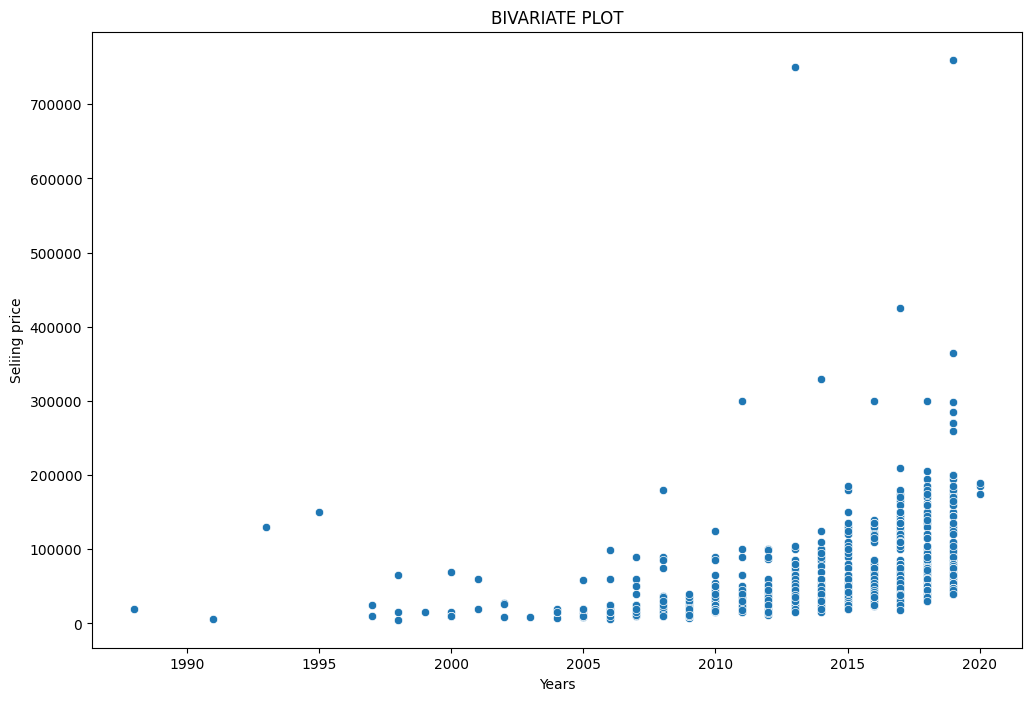

In [ ]:
plt.figure(figsize = (12, 8))
sns.scatterplot(x = 'year', y= 'selling_price', data = df )
plt.title("BIVARIATE PLOT")
plt.xlabel("Years")
plt.ylabel("Seliing price")
plt.show()


Ques-13 What is the average depreciation in selling price based on the bike's age (current year - manufacturing
year) ?

In [ ]:
import pandas as pd

# Assuming 'df' is your DataFrame and 'curyear' is the current year (2024)
curyear = 2024

# Step 1: Calculate the bike's age
df['age'] = curyear - df['year']

# Step 2: Calculate the depreciation (Ex-showroom price - Selling price)
df['depreciation'] = df['ex_showroom_price'] - df['selling_price']

# Step 3: Group by 'age' and calculate the average depreciation for each age
average_depreciation_by_age = df.groupby('age')['depreciation'].mean()

# Display the result
print(average_depreciation_by_age)


age
4    -34260.000000
5      2954.562500
6     13023.194805
7     22306.082353
8     28328.190476
9     28013.275000
10    34505.606061
11    43086.886792
12    37317.648649
13    47102.666667
14    45658.928571
15    38227.785714
16    54732.428571
17    42399.000000
18    39664.500000
19    44852.000000
20    36852.000000
21             NaN
22             NaN
23    34852.000000
24             NaN
25             NaN
26             NaN
27             NaN
29             NaN
31             NaN
33             NaN
36             NaN
Name: depreciation, dtype: float64


Ques-14 Which bike names are priced significantly above the average price for their manufacturing year ?

In [ ]:
import pandas as pd

# Assuming 'df' is the DataFrame containing your dataset

# Step 1: Calculate the average price for each manufacturing year
average_price_by_year = df.groupby('year')['selling_price'].mean()

# Step 2: Merge the average price back into the original DataFrame to compare individual prices
df = df.merge(average_price_by_year, on='year', suffixes=('', '_avg'))

# Step 3: Define the threshold for "significantly above average"
threshold = 1.5  # Example: a price greater than 1.5 times the average price for that year

# Step 4: Identify bikes that are priced significantly above the average price
df['significantly_above_avg'] = df['selling_price'] > (df['selling_price_avg'] * threshold)

# Step 5: Filter bikes that are significantly above average
bikes_above_avg = df[df['significantly_above_avg']]

# Step 6: Display the bike names that are priced significantly above average
print(bikes_above_avg[['name', 'selling_price', 'year', 'selling_price_avg']])


                                     name  selling_price  year  \
2     Royal Enfield Classic Gunmetal Grey         150000  2018   
7    Royal Enfield Bullet 350 [2007-2011]         180000  2008   
13                          Yamaha YZF R3         365000  2019   
18    Royal Enfield Classic Gunmetal Grey         150000  2018   
23                          Jawa Standard         180000  2019   
..                                    ...            ...   ...   
979             Royal Enfield Thunder 500         105000  2015   
981             Royal Enfield Thunder 350         105000  2013   
983             Royal Enfield Classic 350         100000  2015   
984             Royal Enfield Classic 500          95000  2014   
985             Royal Enfield Classic 500          90000  2011   

     selling_price_avg  
2         87660.374046  
7         34289.285714  
13       119689.511628  
18        87660.374046  
23       119689.511628  
..                 ...  
979       56500.000000  
981    

Ques-15  Develop a correlation matrix for numeric columns and visualize it using a heatmap ?

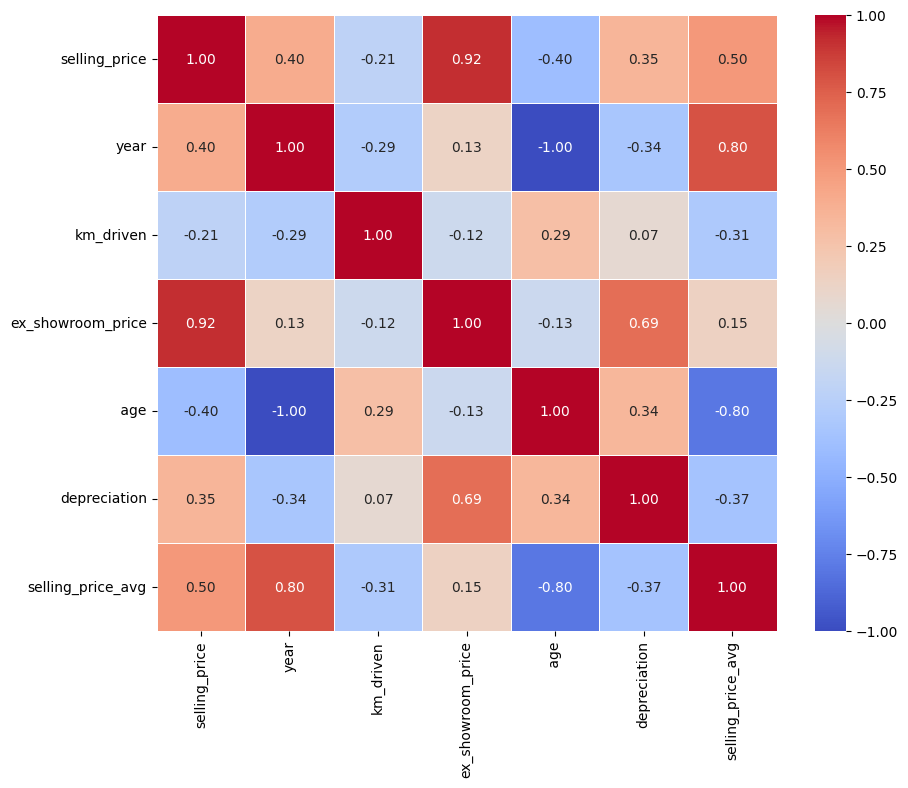

In [ ]:
#Numeric columns for heatmap
numcol = df.select_dtypes(include=['number']).columns

#calculate the correlation matrix
correlation = df[numcol].corr()

# Visualize the correlation
plt.figure(figsize = (10 , 8))
sns.heatmap(correlation, annot = True , cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.show()


# **EDA : CAR SALE DATASET**

In [ ]:
df1 = pd.read_csv("/content/Car Sale.csv")

In [ ]:
df1.head()

,Car_id,Date,Customer Name,Gender,Annual Income,Dealer_Name,Company,Model,Engine,Transmission,Color,Price ($),Dealer_No,Body Style,Phone,Dealer_Region
0,C_CND_000001,1/2/2022,Geraldine,Male,13500,Buddy Storbeck's Diesel Service Inc,Ford,Expedition,DoubleÂ Overhead Camshaft,Auto,Black,26000,06457-3834,SUV,8264678,Middletown
1,C_CND_000002,1/2/2022,Gia,Male,1480000,C & M Motors Inc,Dodge,Durango,DoubleÂ Overhead Camshaft,Auto,Black,19000,60504-7114,SUV,6848189,Aurora
2,C_CND_000003,1/2/2022,Gianna,Male,1035000,Capitol KIA,Cadillac,Eldorado,Overhead Camshaft,Manual,Red,31500,38701-8047,Passenger,7298798,Greenville
3,C_CND_000004,1/2/2022,Giselle,Male,13500,Chrysler of Tri-Cities,Toyota,Celica,Overhead Camshaft,Manual,Pale White,14000,99301-3882,SUV,6257557,Pasco
4,C_CND_000005,1/2/2022,Grace,Male,1465000,Chrysler Plymouth,Acura,TL,DoubleÂ Overhead Camshaft,Auto,Red,24500,53546-9427,Hatchback,7081483,Janesville


In [ ]:
df1.shape

(23906, 16)

Ques-1 What is the average selling price of cars for each dealer, and how does it compare across different dealers ?

In [ ]:
#Average selling price of cars for each dealer
av = df1.groupby('Dealer_Name')['Price ($)'].mean()

#comparing the prices
comp = av.sort_values(ascending = False)

print(comp)

Dealer_Name
U-Haul CO                                          28769.919006
Classic Chevy                                      28602.014446
Rabun Used Car Sales                               28527.536177
Iceberg Rentals                                    28522.958533
Enterprise Rent A Car                              28312.580800
Scrivener Performance Engineering                  28297.371589
Gartner Buick Hyundai Saab                         28247.621019
Saab-Belle Dodge                                   28190.139888
Capitol KIA                                        28189.703822
Race Car Help                                      28163.372706
Chrysler of Tri-Cities                             28123.091054
Star Enterprises Inc                               28113.055244
Suburban Ford                                      28112.206758
C & M Motors Inc                                   28111.755200
Tri-State Mack Inc                                 28095.562050
Pars Auto Sales             

Ques-2  Which car brand (Company) has the highest variation in prices, and what does this tell us about the pricing
trends ?

In [ ]:
#Standard variations of the car
higvar = df1.groupby('Company')['Price ($)'].std()

higvar.sort_values(ascending = False)

#A high variation in prices for a brand (like Brand C) could indicate that the company offers a diverse range of models, from
#budget-friendly to luxury vehicles, which naturally leads to larger price differences.

,Price ($)
Company,
Lincoln,19658.050211
Saab,19653.740089
Cadillac,19517.120220
Plymouth,19065.997338
Lexus,17852.923492
Buick,17142.232626
Mercury,16445.172195
Nissan,16214.264017
Saturn,15990.223671


Ques-3  What is the distribution of car prices for each transmission type, and how do the interquartile ranges
compare ?

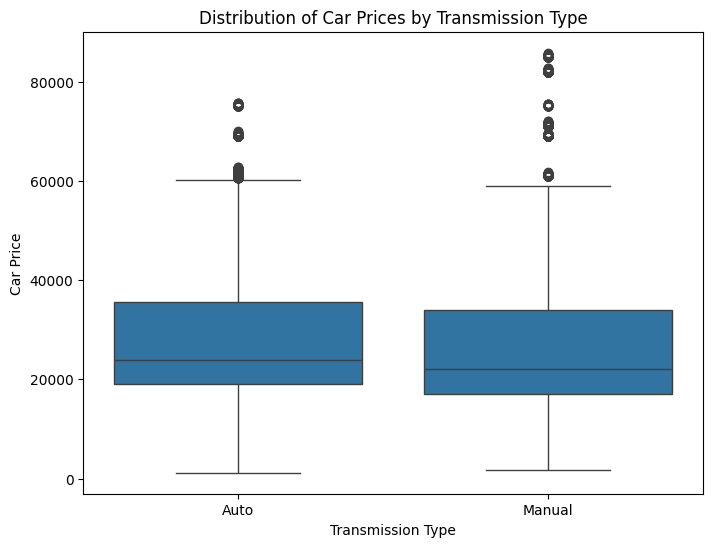

Summary Statistics with IQR for Each Transmission Type:
                  25%      50%      75%      IQR
Transmission                                    
Auto          19000.0  24000.0  35500.0  16500.0
Manual        17000.0  22001.0  34000.0  17000.0


In [ ]:

# Step 1: Group by Transmission_Type and calculate summary statistics
price_stats = df1.groupby('Transmission')['Price ($)'].describe()

# Step 2: Calculate IQR for each transmission type
price_stats['IQR'] = price_stats['75%'] - price_stats['25%']

# Step 3: Plot the distribution of prices using a boxplot
plt.figure(figsize=(8, 6))
sns.boxplot(x='Transmission', y='Price ($)', data=df1)
plt.title('Distribution of Car Prices by Transmission Type')
plt.xlabel('Transmission Type')
plt.ylabel('Car Price')
plt.show()

# Display the summary statistics with IQR
print("Summary Statistics with IQR for Each Transmission Type:")
print(price_stats[['25%', '50%', '75%', 'IQR']])


Ques-4 What is the distribution of car prices across different regions ?

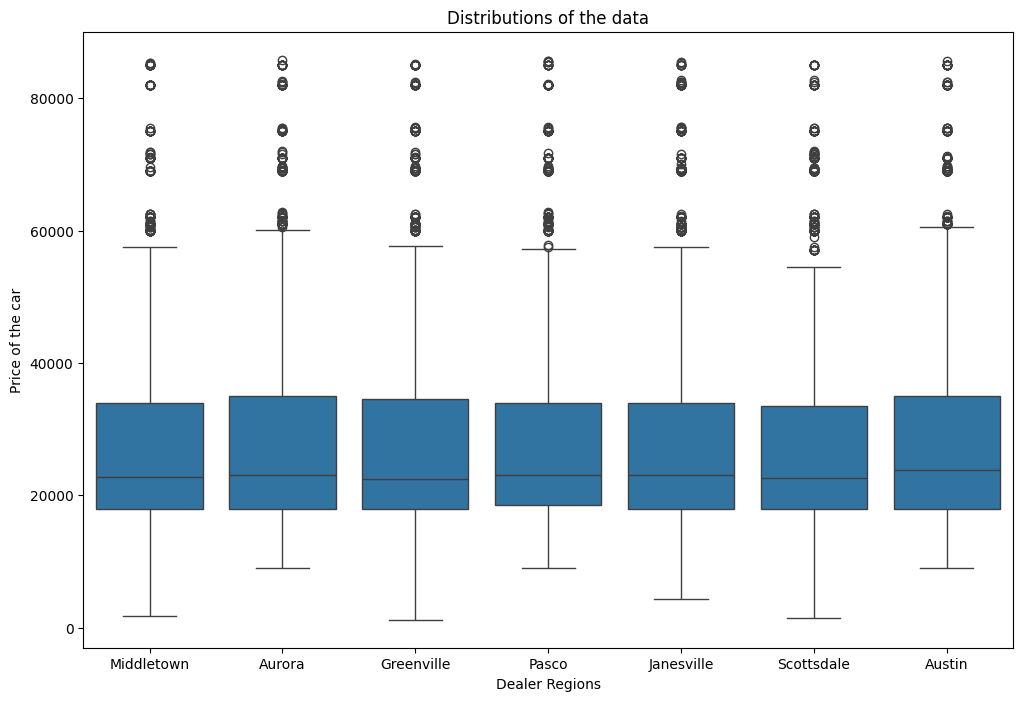

In [ ]:
#Grouping the data
df1.groupby('Dealer_Region')['Price ($)'].describe()

#Distribution of the data
plt.figure(figsize= (12,8))
sns.boxplot(x = 'Dealer_Region' , y = 'Price ($)', data = df1)
plt.title("Distributions of the data")
plt.xlabel("Dealer Regions")
plt.ylabel("Price of the car")
plt.show()

Ques-5  What is the distribution of cars based on body styles ?

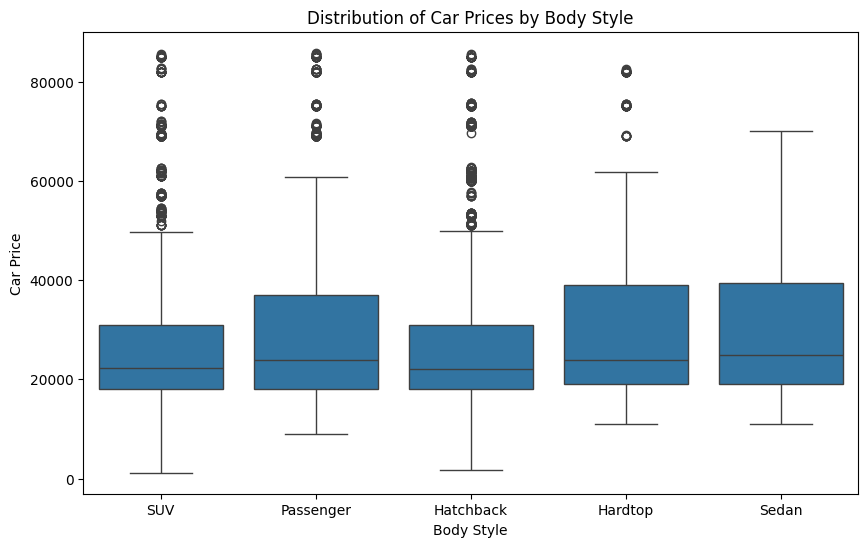

In [ ]:

plt.figure(figsize=(10, 6))
sns.boxplot(x='Body Style', y='Price ($)', data=df1)
plt.title('Distribution of Car Prices by Body Style')
plt.xlabel('Body Style')
plt.ylabel('Car Price')
plt.show()

Ques- How does the average selling price of cars vary by customer gender and annual income ?

In [ ]:
cus =  df1.groupby(['Gender', 'Annual Income'])['Price ($)'].mean()
print(cus)

Gender  Annual Income
Female  13500            28132.038732
        106000           46001.000000
        121000           20000.000000
        190000           19001.000000
        211000           51000.000000
                             ...     
Male    6600000          39000.000000
        6800000          15000.000000
        7650000          21000.000000
        8000000          85000.000000
        11200000         26001.000000
Name: Price ($), Length: 3442, dtype: float64


Ques-7  What is the distribution of car prices by region, and how does the number of cars sold vary by region ?

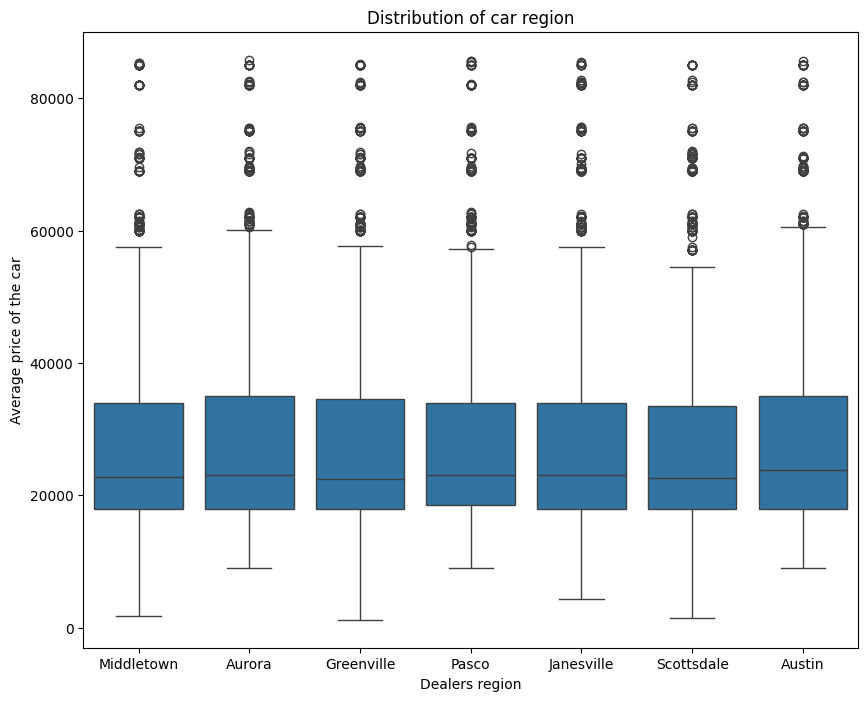

                count          mean           std     min      25%      50%  \
Dealer_Region                                                                 
Aurora         3130.0  28334.626837  15026.207252  9000.0  18001.0  23000.0   
Austin         4135.0  28341.603628  14903.884549  9000.0  18001.0  23801.0   
Greenville     3128.0  28180.819054  15101.538328  1200.0  18001.0  22500.0   
Janesville     3821.0  27833.350955  14344.995638  4300.0  18001.0  23000.0   
Middletown     3128.0  27856.338875  14619.842395  1700.0  18000.0  22750.0   
Pasco          3131.0  28119.039923  14659.315941  9000.0  18500.5  23000.0   
Scottsdale     3433.0  27954.958928  14902.916820  1450.0  18000.0  22600.0   

                   75%      max  
Dealer_Region                    
Aurora         35000.0  85800.0  
Austin         35001.0  85601.0  
Greenville     34500.0  85200.0  
Janesville     34000.0  85400.0  
Middletown     34000.0  85300.0  
Pasco          34000.0  85600.0  
Scottsdale     3

In [ ]:
# Distribution of car price by region
plt.figure(figsize = (10, 8))
sns.boxplot(x = 'Dealer_Region' , y = "Price ($)" , data = df1)
plt.title("Distribution of car region")
plt.xlabel("Dealers region")
plt.ylabel("Average price of the car")
plt.show()

cars = df1.groupby('Dealer_Region')["Price ($)"].describe()
print(cars)

Ques-8  How does the average car price differ between cars with different engine sizes ?

In [ ]:
df1.groupby('Engine')['Price ($)'].mean()

,Price ($)
Engine,
DoubleÂ Overhead Camshaft,28248.525972
Overhead Camshaft,27914.710631


Ques-9 How do car prices vary based on the customer’s annual income bracket ?

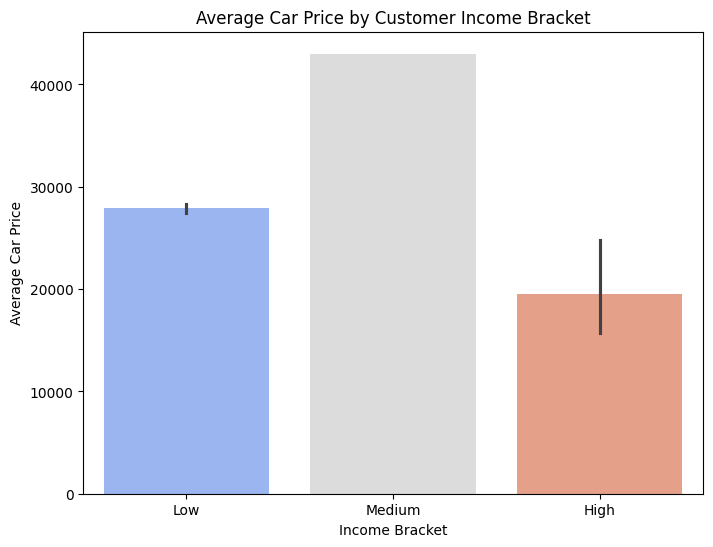

Average Car Price by Income Bracket:
  Income_Bracket     Price ($)
0            Low  27884.297820
1         Medium  43000.000000
2           High  19536.071429


In [ ]:
# Step 1: Define income brackets (e.g., low, medium, high)
bins = [0, 50000, 100000, 200000]  # Define income ranges
labels = ['Low', 'Medium', 'High']  # Define labels for income brackets

# Step 2: Categorize each customer based on their annual income
df1['Income_Bracket'] = pd.cut(df1['Annual Income'], bins=bins, labels=labels, right=False)

# Step 3: Group by Income_Bracket and calculate the average car price
avg_price_by_income_bracket = df1.groupby('Income_Bracket')['Price ($)'].mean().reset_index()

# Step 4: Visualize the data using a bar plot
plt.figure(figsize=(8, 6))
sns.barplot(x='Income_Bracket', y='Price ($)', data= df1, palette='coolwarm')
plt.title('Average Car Price by Customer Income Bracket')
plt.xlabel('Income Bracket')
plt.ylabel('Average Car Price')
plt.show()

# Step 5: Display the average price data for interpretation
print("Average Car Price by Income Bracket:")
print(avg_price_by_income_bracket)


Ques-10 What are the top 5 car models with the highest number of sales, and how does their price distribution look ?

In [ ]:
df1['Model'].value_counts(ascending = False).head()

,count
Model,
Diamante,418
Silhouette,411
Prizm,411
Passat,391
Ram Pickup,383


Qus-11 How does car price vary with engine size across different car colors, and which colors have the highest price
variation ?

In [ ]:

df1.groupby(['Engine' , 'Color'])['Price ($)'].var()

Engine                     Color     
DoubleÂ Overhead Camshaft  Black         1.542235e+08
                           Pale White    2.074295e+08
                           Red           1.822326e+08
Overhead Camshaft          Black         3.047610e+08
                           Pale White    1.690027e+08
                           Red           3.009060e+08
Name: Price ($), dtype: float64

Ques-12  Is there any seasonal trend in car sales based on the date of sale ?

In [ ]:
df1.groupby('Company')['Date'].value_counts()

Company  Date      
Acura    12/25/2022    8
         11/24/2023    7
         12/18/2023    7
         10/21/2023    6
         11/10/2023    6
                      ..
Volvo    9/28/2022     1
         9/30/2023     1
         9/5/2022      1
         9/5/2023      1
         9/9/2023      1
Name: count, Length: 10489, dtype: int64

Ques13 How does the car price distribution change when considering different combinations of body style and
transmission type ?

In [ ]:
df1.groupby(['Body Style', 'Transmission'])['Price ($)'].mean()

Body Style  Transmission
Hardtop     Auto            31520.188210
            Manual          27016.943698
Hatchback   Auto            25910.544824
            Manual          28702.550562
Passenger   Auto            28915.835149
            Manual          28969.521039
SUV         Auto            27501.404407
            Manual          26079.019161
Sedan       Auto            29955.294344
            Manual          29664.271572
Name: Price ($), dtype: float64

Ques-14  What is the correlation between car price, engine size, and annual income of customers, and how do these
features interact ?

(10, 3)


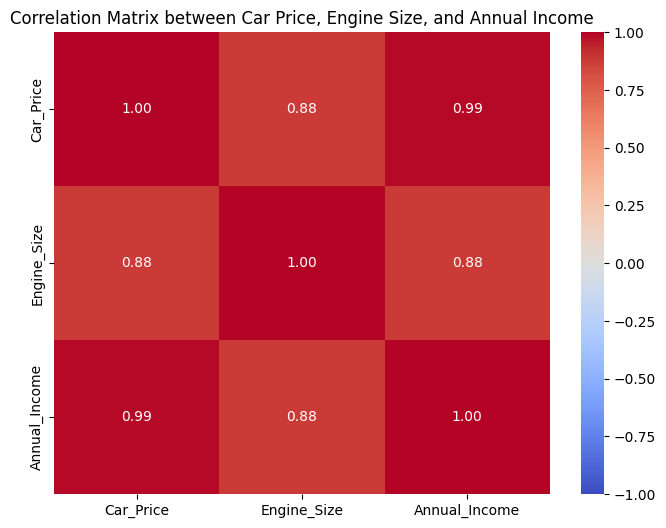

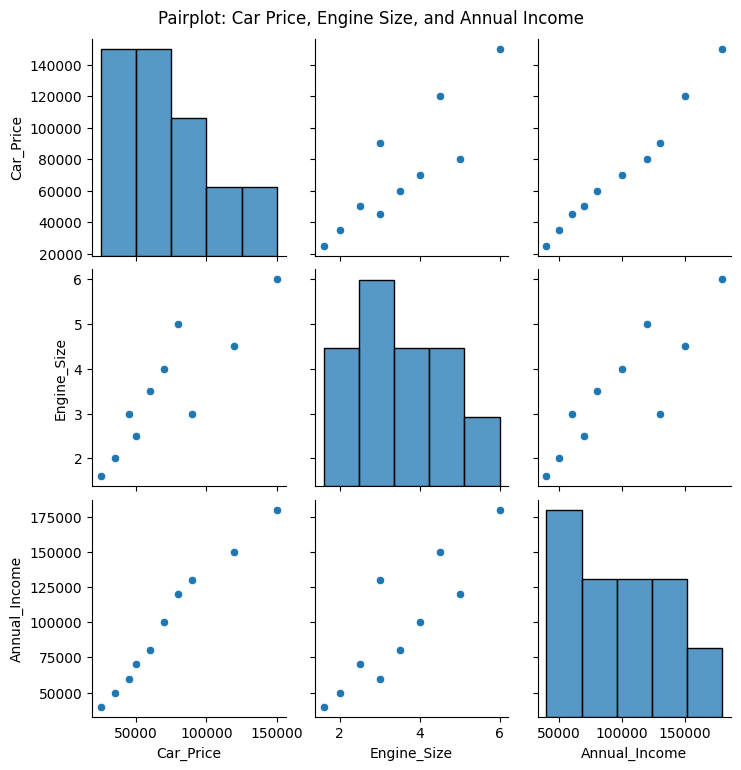

Correlation between Car Price and Engine Size: 0.88
Correlation between Car Price and Annual Income: 0.99
Correlation between Engine Size and Annual Income: 0.88


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Sample data (ensure this is in a 2-dimensional format, i.e., as a DataFrame)
data = {
    'Car_Price': [25000, 35000, 45000, 50000, 60000, 70000, 80000, 90000, 120000, 150000],
    'Engine_Size': [1.6, 2.0, 3.0, 2.5, 3.5, 4.0, 5.0, 3.0, 4.5, 6.0],
    'Annual_Income': [40000, 50000, 60000, 70000, 80000, 100000, 120000, 130000, 150000, 180000]
}

# Create a DataFrame
df = pd.DataFrame(data)

# Now df is a 2D object (rows and columns)
# Print the shape of df to confirm
print(df.shape)  # Should print (10, 3), 10 rows and 3 columns

# Calculate correlation matrix for the entire DataFrame
correlation_matrix = df.corr()

# Visualize the correlation matrix using heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', vmin=-1, vmax=1)
plt.title("Correlation Matrix between Car Price, Engine Size, and Annual Income")
plt.show()

# Plot scatter plots to see the relationships
sns.pairplot(df)
plt.suptitle("Pairplot: Car Price, Engine Size, and Annual Income", y=1.02)
plt.show()

# Calculate individual correlations between variables
car_price_engine_corr = df['Car_Price'].corr(df['Engine_Size'])
car_price_income_corr = df['Car_Price'].corr(df['Annual_Income'])
engine_income_corr = df['Engine_Size'].corr(df['Annual_Income'])

print(f"Correlation between Car Price and Engine Size: {car_price_engine_corr:.2f}")
print(f"Correlation between Car Price and Annual Income: {car_price_income_corr:.2f}")
print(f"Correlation between Engine Size and Annual Income: {engine_income_corr:.2f}")


Ques-15  How does the average car price vary across different car models and engine types?

In [ ]:
df1.groupby(['Model' , 'Engine'])['Price ($)'].mean()

Model     Engine                   
3-Sep     DoubleÂ Overhead Camshaft    37986.380117
3000GT    DoubleÂ Overhead Camshaft    22764.326923
          Overhead Camshaft            21770.659864
300M      DoubleÂ Overhead Camshaft    21394.888889
323i      DoubleÂ Overhead Camshaft    16744.632287
                                           ...     
Windstar  Overhead Camshaft            17100.272727
Wrangler  DoubleÂ Overhead Camshaft    21145.294737
          Overhead Camshaft            18742.942029
Xterra    DoubleÂ Overhead Camshaft    15940.459459
          Overhead Camshaft            31072.500000
Name: Price ($), Length: 261, dtype: float64

# **EDA 3 - Amazon sales data**

In [ ]:
df2 = pd.read_csv("/content/amazon.csv")
df2.head()

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,₹399,"₹1,099",64%,4.2,"24,269",High Compatibility : Compatible With iPhone 12...,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...","Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jasp...","R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...","Satisfied,Charging is really fast,Value for mo...",Looks durable Charging is fine tooNo complains...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories|Accessories&Peripherals|...,₹199,₹349,43%,4.0,"43,994","Compatible with all Type C enabled devices, be...","AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...","ArdKn,Nirbhay kumar,Sagar Viswanathan,Asp,Plac...","RGIQEG07R9HS2,R1SMWZQ86XIN8U,R2J3Y1WL29GWDE,RY...","A Good Braided Cable for Your Type C Device,Go...",I ordered this cable to connect my phone to An...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Ambrane-Unbreakable-Char...
2,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,Computers&Accessories|Accessories&Peripherals|...,₹199,"₹1,899",90%,3.9,"7,928",【 Fast Charger& Data Sync】-With built-in safet...,"AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ...","Kunal,Himanshu,viswanath,sai niharka,saqib mal...","R3J3EQQ9TZI5ZJ,R3E7WBGK7ID0KV,RWU79XKQ6I1QF,R2...","Good speed for earlier versions,Good Product,W...","Not quite durable and sturdy,https://m.media-a...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Sounce-iPhone-Charging-C...
3,B08HDJ86NZ,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,Computers&Accessories|Accessories&Peripherals|...,₹329,₹699,53%,4.2,"94,363",The boAt Deuce USB 300 2 in 1 cable is compati...,"AEWAZDZZJLQUYVOVGBEUKSLXHQ5A,AG5HTSFRRE6NL3M5S...","Omkar dhale,JD,HEMALATHA,Ajwadh a.,amar singh ...","R3EEUZKKK9J36I,R3HJVYCLYOY554,REDECAZ7AMPQC,R1...","Good product,Good one,Nice,Really nice product...","Good product,long wire,Charges good,Nice,I bou...",https://m.media-amazon.com/images/I/41V5FtEWPk...,https://www.amazon.in/Deuce-300-Resistant-Tang...
4,B08CF3B7N1,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,Computers&Accessories|Accessories&Peripherals|...,₹154,₹399,61%,4.2,"16,905",[CHARGE & SYNC FUNCTION]- This cable comes wit...,"AE3Q6KSUK5P75D5HFYHCRAOLODSA,AFUGIFH5ZAFXRDSZH...","rahuls6099,Swasat Borah,Ajay Wadke,Pranali,RVK...","R1BP4L2HH9TFUP,R16PVJEXKV6QZS,R2UPDB81N66T4P,R...","As good as original,Decent,Good one for second...","Bought this instead of original apple, does th...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Portronics-Konnect-POR-1...


Ques-1 What is the average rating for each product category ?

Ques-2 What are the top rating_count products by category ?

In [ ]:
df2.dropna(subset=['rating_count'] , inplace = True)
df2.groupby('category')['rating_count'].max()

,rating_count
category,
Car&Motorbike|CarAccessories|InteriorAccessories|AirPurifiers&Ionizers,"1,118"
Computers&Accessories|Accessories&Peripherals|Adapters|USBtoUSBAdapters,"4,426"
Computers&Accessories|Accessories&Peripherals|Audio&VideoAccessories|PCHeadsets,"7,222"
Computers&Accessories|Accessories&Peripherals|Audio&VideoAccessories|PCMicrophones,"2,804"
Computers&Accessories|Accessories&Peripherals|Audio&VideoAccessories|PCSpeakers,"7,352"
...,...
"OfficeProducts|OfficePaperProducts|Paper|Stationery|Pens,Pencils&WritingSupplies|Pens&Refills|GelInkRollerballPens","5,792"
"OfficeProducts|OfficePaperProducts|Paper|Stationery|Pens,Pencils&WritingSupplies|Pens&Refills|LiquidInkRollerballPens","6,199"
"OfficeProducts|OfficePaperProducts|Paper|Stationery|Pens,Pencils&WritingSupplies|Pens&Refills|RetractableBallpointPens","5,719"


Ques-3  What is the distribution of discounted prices vs. actual prices ?

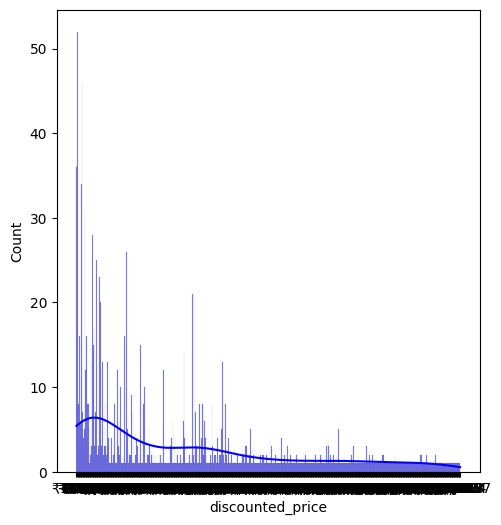

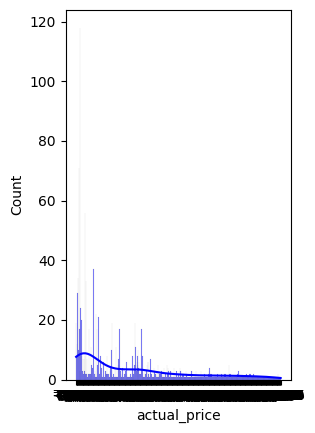

In [ ]:
#Creating figure size for subplots
plt.figure(figsize = (12 ,6))

#Subplot for Discounted price
plt.subplot(1 ,2 ,1)
sns.histplot(df2['discounted_price'], kde=True, color='blue', bins=20)
plt.show()

# Subplot for actual price
plt.subplot(1 , 2, 2)
sns.histplot(df2['actual_price'], kde=True, color='blue', bins=20)
plt.show()

Ques-4  How does the average discount percentage vary across categories ?

In [ ]:
# Remove the percentage sign and convert the column to integer
df2['discount_percentage'] = df2['discount_percentage'].str.replace('%', '').astype(int)

In [ ]:
df2.groupby('category')['discount_percentage'].mean()

,discount_percentage
category,
Car&Motorbike|CarAccessories|InteriorAccessories|AirPurifiers&Ionizers,42.0
Computers&Accessories|Accessories&Peripherals|Adapters|USBtoUSBAdapters,78.5
Computers&Accessories|Accessories&Peripherals|Audio&VideoAccessories|PCHeadsets,35.0
Computers&Accessories|Accessories&Peripherals|Audio&VideoAccessories|PCMicrophones,56.5
Computers&Accessories|Accessories&Peripherals|Audio&VideoAccessories|PCSpeakers,46.5
...,...
"OfficeProducts|OfficePaperProducts|Paper|Stationery|Pens,Pencils&WritingSupplies|Pens&Refills|GelInkRollerballPens",0.0
"OfficeProducts|OfficePaperProducts|Paper|Stationery|Pens,Pencils&WritingSupplies|Pens&Refills|LiquidInkRollerballPens",5.0
"OfficeProducts|OfficePaperProducts|Paper|Stationery|Pens,Pencils&WritingSupplies|Pens&Refills|RetractableBallpointPens",17.5


Ques-5 What are the most popular product names ?

In [ ]:
# Fire bolt ninja call pr..... is the popular product
df2['product_name'].value_counts(ascending = False)

,count
product_name,
"Fire-Boltt Ninja Call Pro Plus 1.83"" Smart Watch with Bluetooth Calling, AI Voice Assistance, 100 Sports Modes IP67 Rating, 240*280 Pixel High Resolution",5
"Fire-Boltt Phoenix Smart Watch with Bluetooth Calling 1.3"",120+ Sports Modes, 240*240 PX High Res with SpO2, Heart Rate Monitoring & IP67 Rating",4
"Wayona Nylon Braided USB to Lightning Fast Charging and Data Sync Cable Compatible for iPhone 13, 12,11, X, 8, 7, 6, 5, iPad Air, Pro, Mini (3 FT Pack of 1, Grey)",3
MI Braided USB Type-C Cable for Charging Adapter (Red),3
"Amazonbasics Nylon Braided Usb-C To Lightning Cable, Fast Charging Mfi Certified Smartphone, Iphone Charger (6-Foot, Dark Grey)",3
...,...
"SanDisk Ultra microSD UHS-I Card 64GB, 120MB/s R",1
"Noise ColorFit Ultra SE Smart Watch with 1.75""(4.3cm) HD Display, Aluminium Alloy Body, 60 Sports Modes, Spo2, Lightweight, Stock Market Info, Calls & SMS Reply (Vintage Brown)",1
Nokia 150 (2020) (Cyan),1


Ques-6 What are the most popular product keywords ?

In [ ]:
# Charge & sync function is the popular product keywords in all
df2['about_product'].value_counts(ascending = False)

,count
about_product,
"[CHARGE & SYNC FUNCTION]- This cable comes with charging & Data sync function|[HIGH QUALITY MATERIAL]- TPE + Nylon Material to make sure that the life of the cable is enhanced significantly|[LONG CORD]- The Cable is extra thick 1.2 meter long, optimized for an easy use for your comfort at home or office|[MORE DURABLE]-This cable is unique interms of design and multi-use and is positioned to provide the best comfort and performance while using|[UNIVERSAL COMPATIBILITY]- Compatible with all devices like iPhone XS, X, XR, 8, 7, 6S, 6, 5S, iPad Pro, iPad mini and iPad Air",6
Added Protection: An additional layer of protection has been added to the Lightning and USB ends to improve durability and reduce fraying;,5
"Bluetooth Calling- Wave Call comes with a premium built-in speaker and bluetooth calling via which you can stay connected to your friends, family, and colleagues|Dial Pad- Its dial pad is super responsive and convenient. You can also save upto 10 contacts in this smart watch|Screen Size- Wave Call comes with a 1.69” HD Display that features a bold, bright, and highly responsive 2.5D curved touch interface|Resolution- With 550 nits of brightness get sharper color resolution that brightens your virtual world exponentially.|Design- The ultra slim and lightweight design of the watch is ideal to keep you surfing your wave all day!|Watch Faces- Wave Call comes with 150+ Cloud watchfaces for you to pick from, complementing your every mood and outfit|HR, SpO2 & Breathing- Monitor your heart rate and blood oxygen levels on-the-go with the heart rate and SpO2 monitor. It also comes with Guided Breathing to help you relax and embrace mindfulness.",5
"The boAt Deuce USB 300 2 in 1 cable is compatible with smartphones, tablets, PC peripherals, Bluetooth speakers, power banks and all other devices with Type-C as well as Micro USB port|It ensures 3A fast charging and data transmissions with rapid sync at 480 mbps|The premium Nylon braided skin makes it sturdy and invincible against external damage|Its Aluminium alloy shell housing makes it last longer with 10000+ Bends Lifespan with extended frame protection for strain relief|The resilient and flexible design offers a tangle free experience seamlessly|Deuce USB 300 cable offers a perfect 1.5 meters in length for smooth & hassle-free user experience|2 years warranty from the date of purchase",4
"Screen Size: The 1.69 inch HD full touch display with 500 nits of brightness will bring every detail to life!|Resolution: Get sharper color resolution that brightens your virtual world exponentially.|Slim Design: The ultra slim and lightweight design of the watch is ideal to keep you surfing your wave all day!|Sports Modes: Track your daily activity: calories burnt & steps taken. Choose from multiple sports modes which include Walking, Running, Cycling, Climbing, Yoga, Basketball, Football & many more|Google Fit & Apple Health: The watch supports Google and Apple Fit to seamlessly monitor your health.|IP Rating: Sweat freely while you work out with IP68 dust, sweat and splash resistance.|Watch Faces- Customize your style with 140+ based watch faces.",4
...,...
"> ★ ★------->EASY TO FOLD OUT: Clever folding design allows the legs to fold flat so you can easily put it behind the door or the corner of home when not in use. No need to install everytime you use.|>★★------->LARGE, STABLE, PORTABLE FOLDING TABLE: The folding size of our laptop desk is about 60cm(L) * 39.5cm(W) * 27cm(H) such that it fits upto 11-17inch laptops and also a space for mouse. Built-in iPad stand groove for holding ipad or kindle. Our table comes with a table cup holder to keep your favorite drink within reach.|>★ ★------->MULTI-PURPOSE LAPTOP DESK: Laptop bed tray is perfect lap desks for work, games, reading, eating and school from the comfort of your bed, floor, sofa or couch. Great work from home gift & bed accessories!|> ★ ★------->NON-SLIP BOTTOM DESIGN: The steel feet are covered with black spon

Ques-7 What are the most popular product reviews ?

In [ ]:
df2['review_title'].value_counts(ascending = False)

,count
review_title,
"Worked on iPhone 7 and didn’t work on XR,Good one,Dull Physical Looks,Just Buy it,Go for it,About the product,Get charging cable at the price,Working well.",10
"Satisfied,Charging is really fast,Value for money,Product review,Good quality,Good product,Good Product,As of now seems good",8
"Phone, camera, heating - works for me, may not for all,Good Mobile,Good but not excellent under this budget,Worth the price at 9499,Ok type phone... but unable to make videocall within same service provider.,Phone review,Budget king,Battery backup is good",8
"Good product,Good one,Nice,Really nice product,Very first time change,Good,Fine product but could be better,Very nice it's charging like jet",7
"A Good Braided Cable for Your Type C Device,Good quality product from ambrane,Super cable,As,Good quality,Good product,its good,Good quality for the price but one issue with my unit",7
...,...
"Good product,Value for money,Car charger,Good product,A good product- must have accessory for car,Good charger,Good,बहुत ही अच्छा चार्जर है",1
"To good,Build material,Super,Good product,Budget bluetooth speaker which serves the purpose of low volume on a phone or laptop,best,It's OK to use in small room. But for Outdoor activities it will not meet our expectations.,Awesome product",1
"light weight okay in this price range,Value for money,Good,EASY TO USE,Value for money,this is no soft touch keyboard,Good product in this price range,Budget friendly",1


Ques-8 What is the correlation between discounted_price and rating ?

In [ ]:
df2['rating'].corr(df2['discounted_price'])

ValueError: could not convert string to float: '|'

Ques-9  What are the Top 5 categories based on the highest ratings ?

In [ ]:
df2.groupby('category')['rating'].max()

,rating
category,
Car&Motorbike|CarAccessories|InteriorAccessories|AirPurifiers&Ionizers,3.8
Computers&Accessories|Accessories&Peripherals|Adapters|USBtoUSBAdapters,4.3
Computers&Accessories|Accessories&Peripherals|Audio&VideoAccessories|PCHeadsets,3.5
Computers&Accessories|Accessories&Peripherals|Audio&VideoAccessories|PCMicrophones,3.9
Computers&Accessories|Accessories&Peripherals|Audio&VideoAccessories|PCSpeakers,4.1
...,...
"OfficeProducts|OfficePaperProducts|Paper|Stationery|Pens,Pencils&WritingSupplies|Pens&Refills|GelInkRollerballPens",4.3
"OfficeProducts|OfficePaperProducts|Paper|Stationery|Pens,Pencils&WritingSupplies|Pens&Refills|LiquidInkRollerballPens",4.2
"OfficeProducts|OfficePaperProducts|Paper|Stationery|Pens,Pencils&WritingSupplies|Pens&Refills|RetractableBallpointPens",4.3


Ques-10 Identify any potential areas for improvement or optimization based on the data analysis ?

In [ ]:
# removing the null values
df2.isnull().sum()
df2.dropna(inplace = True)

In [ ]:
df2.isnull().sum()

,0
product_id,0
product_name,0
category,0
discounted_price,0
actual_price,0
discount_percentage,0
rating,0
rating_count,0
about_product,0
user_id,0


# **EDA 4 :  Spotify data**

In [ ]:
df3 = pd.read_csv("/content/spotify.csv")

In [ ]:
df3.head()

,Artist,Track Name,Popularity,Duration (ms),Track ID
0,Drake,Rich Baby Daddy (feat. Sexyy Red & SZA),92,319191,1yeB8MUNeLo9Ek1UEpsyz6
1,Drake,One Dance,91,173986,1zi7xx7UVEFkmKfv06H8x0
2,Drake,IDGAF (feat. Yeat),90,260111,2YSzYUF3jWqb9YP9VXmpjE
3,Drake,First Person Shooter (feat. J. Cole),88,247444,7aqfrAY2p9BUSiupwk3svU
4,Drake,Jimmy Cooks (feat. 21 Savage),88,218364,3F5CgOj3wFlRv51JsHbxhe


In [ ]:
df3.shape

(440, 5)

Ques-1 Read the dataframe, check null value if present then do the needful, check duplicate row , if present then do
the needful ?

In [ ]:
# checking the null values
df3.isnull().sum()

,0
Artist,0
Track Name,0
Popularity,0
Duration (ms),0
Track ID,0


In [ ]:
# Checking the duplicate values
df3.duplicated().sum()

27

In [ ]:
#Dropping the duplicate values
df3.drop_duplicates(inplace = True)

In [ ]:
# Rechecking the duplicate values
df3.duplicated().sum()

0

Ques2 What is the distribution of popularity among the tracks in the dataset? Visualize it using a histogram?

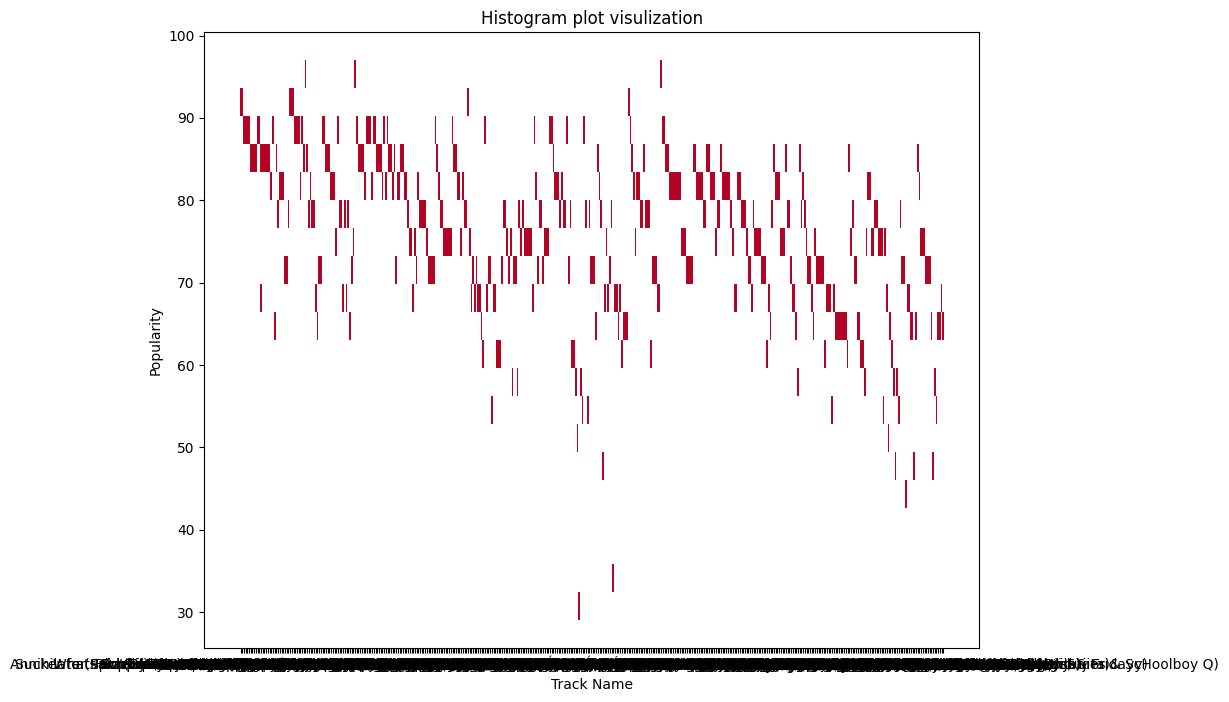

In [ ]:
plt.figure(figsize = (10,8))
sns.histplot(x = "Track Name" , y = "Popularity" , data = df3 , bins = 20, cmap = "coolwarm" , kde = True)
plt.title("Histogram plot visulization")
plt.show()


Ques-3  Is there any relationship between the popularity and the duration of tracks? Explore this using a scatter plot ?

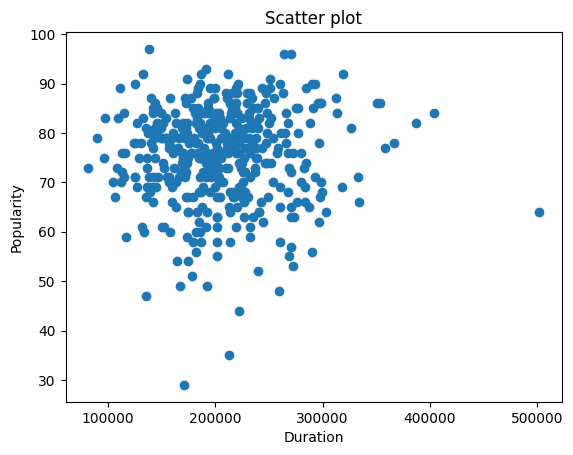

In [ ]:
# Scatter plot showing relation between popularity and duration
plt.scatter(x = "Duration (ms)" , y = "Popularity" , data = df3 )
plt.title("Scatter plot")
plt.xlabel("Duration")
plt.ylabel("Popularity")
plt.show()

Ques-4  Which artist has the highest number of tracks in the dataset? Display the count of tracks for each artist using
a countplot ?

<Axes: xlabel='Track Name', ylabel='count'>

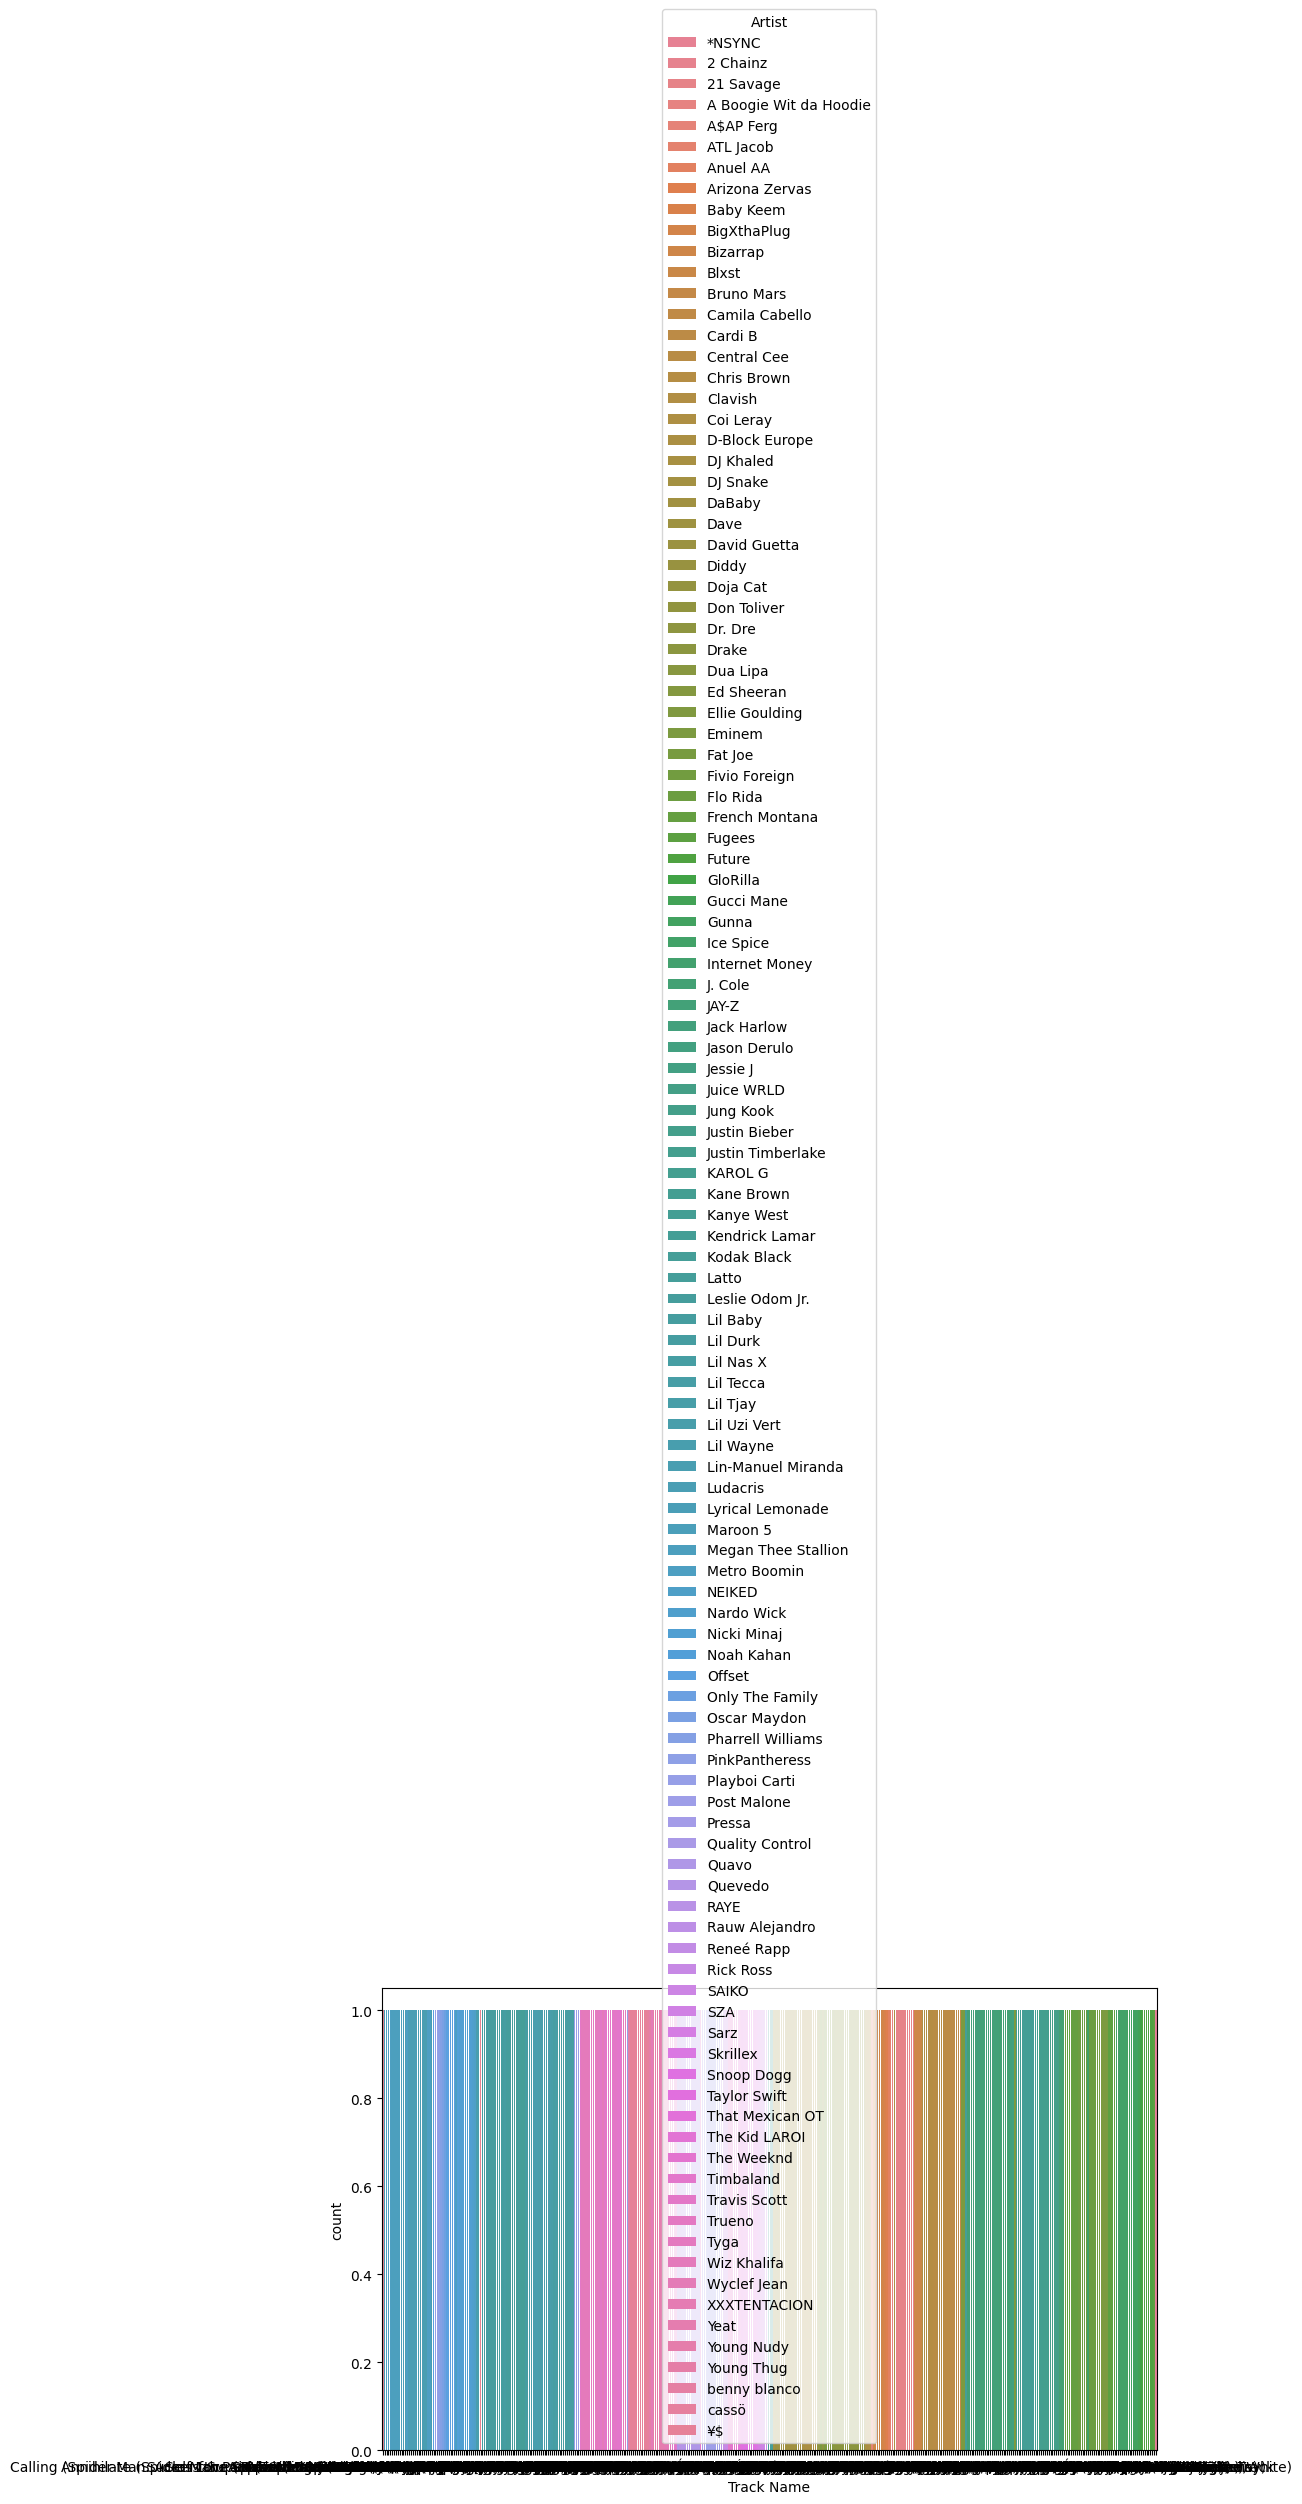

In [ ]:
track_counts = df3.groupby("Artist")["Track Name"].value_counts(ascending = False).reset_index(name='count')

plt.figure(figsize=(10, 6))
sns.countplot(x='Track Name', hue='Artist', data=track_counts, order=track_counts['Track Name'].value_counts().index)

Ques-5 What are the top 5 least popular tracks in the dataset? Provide the artist name and track name for each ?

In [ ]:
# Group by Artist and Track Name and count occurrences
track_counts = df3.groupby(['Artist', 'Track Name']).size().reset_index(name='count')

# Sort by the 'count' in ascending order to find the least popular tracks
least_popular_tracks = track_counts.sort_values(by='count', ascending=True)

# Get the top 5 least popular tracks
top_5_least_popular_tracks = least_popular_tracks.head(5)

# Display the results
print(top_5_least_popular_tracks)


                  Artist                                         Track Name  \
0                 *NSYNC                             Better Place (Reunion)   
279         Metro Boomin  Annihilate (Spider-Man: Across the Spider-Vers...   
278  Megan Thee Stallion                                          Thot Shit   
277  Megan Thee Stallion                                       Sweetest Pie   
276  Megan Thee Stallion                                               HISS   

     count  
0        1  
279      1  
278      1  
277      1  
276      1  


Ques - Among the top 5 most popular artists, which artist has the highest popularity on average? Calculate and
display the average popularity for each artist ?

In [ ]:
# Calculate the popularity (assuming 'popularity' column exists)
# If you want to use ratings or other columns instead, adjust the column name accordingly.

# Group by Artist and Track Name, and calculate the average popularity for each track
artist_popularity = df3.groupby(['Artist', 'Track Name'])['Popularity'].mean().reset_index()

# Now, calculate the total popularity for each artist by summing up the popularity of their tracks
artist_total_popularity = artist_popularity.groupby('Artist')['Popularity'].mean().reset_index()

# Sort the artists by total popularity in descending order to get the top 5 most popular artists
top_5_artists = artist_total_popularity.sort_values(by='Popularity', ascending=False).head(5)

# Display the average popularity for each artist in the top 5
print(top_5_artists)


           Artist  Popularity
113         cassö   92.000000
104        Trueno   89.000000
24   David Guetta   87.000000
103  Travis Scott   86.555556
114            ¥$   85.100000


Ques-7 For the top 5 most popular artists, what are their most popular tracks? List the track name for each artist ?

In [ ]:
df3['Track Name'].value_counts(ascending = False)

,count
Track Name,
Dial Drunk (with Post Malone),2
Rich Baby Daddy (feat. Sexyy Red & SZA),1
New Tank,1
Low (feat. T-Pain),1
Life Goes On,1
...,...
Eagle,1
Overseas,1
Prada,1


In [ ]:
df3.groupby("Track Name")["Popularity"].value_counts()

,,count
Track Name,Popularity,
20 Min,84,1
3 Headed Goat (feat. Lil Baby & Polo G),75,1
3D (feat. Jack Harlow),84,1
4:44,74,1
6 Foot 7 Foot,74,1
...,...,...
pop ur shit,79,1
prove it,82,1
pushin P (feat. Young Thug),75,1


Ques-8 Visualize relationships between multiple numerical variables simultaneously using a pair plot ?

<Figure size 1000x800 with 0 Axes>

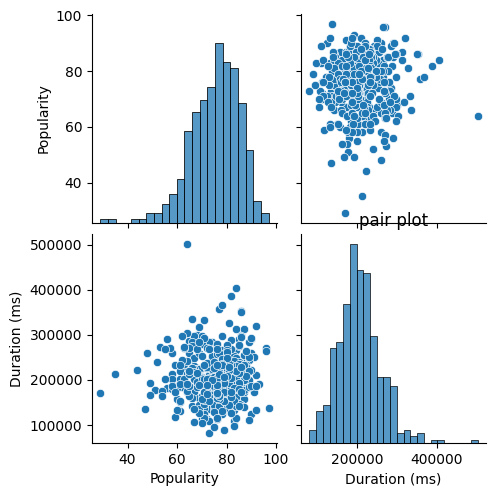

In [ ]:
# Pair plot visualization
plt.figure(figsize = (10 ,8))
sns.pairplot(df3)
plt.title("pair plot")
plt.show()

Ques-9 Does the duration of tracks vary significantly across different artists? Explore this visually using a box plot or
violin plot ?

<Axes: xlabel='Artist', ylabel='Duration (ms)'>

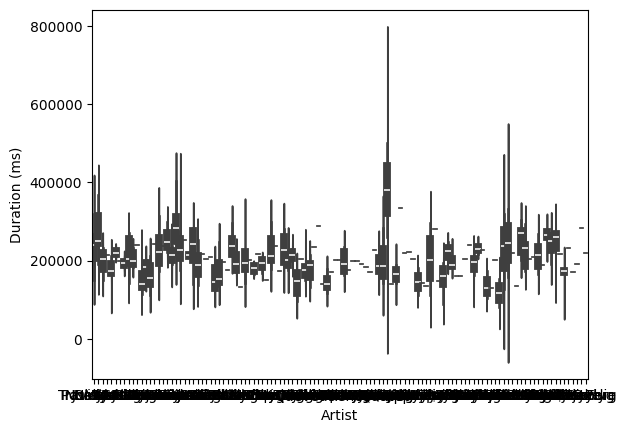

In [86]:
sns.violinplot(x = "Artist" , y = "Duration (ms)" , data = df3)

Ques-10 How does the distribution of track popularity vary for different artists? Visualize this using a swarm plot or a
violin plot ?

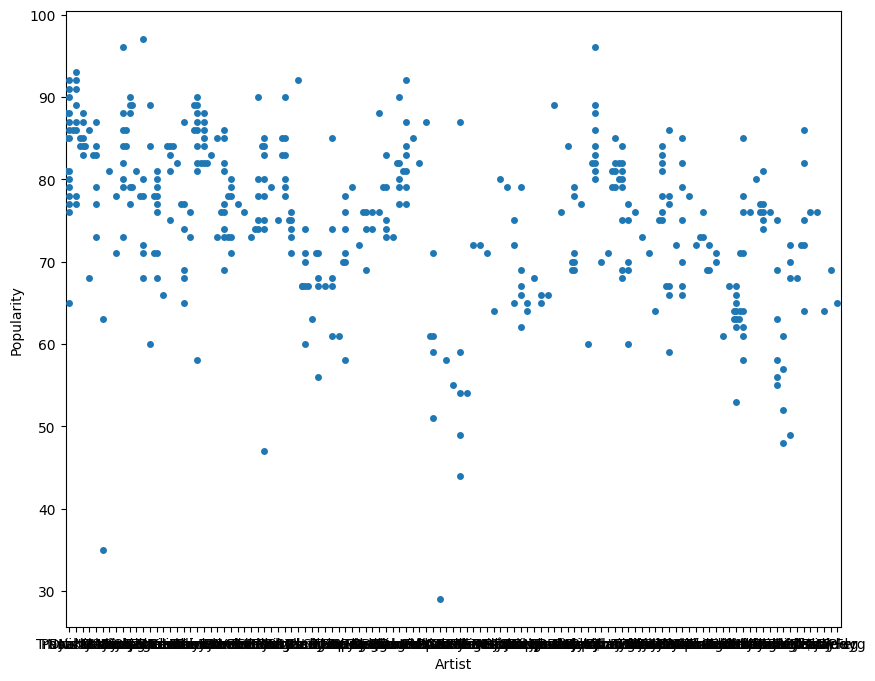

In [88]:
plt.figure(figsize = (10 ,8))
sns.swarmplot(x ="Artist" , y = "Popularity" , data = df3)
plt.show()